# Modeling

So far... we have just over 700 scripts devolved into bag-of-words, along with ratings (from 10 to 100, as integers). Let's start modeling! 

We'll read in the datafile, create a training and a testing set, and then try some models. First we'll do a simple model that just predicts the mean of the ratings; then we'll try a random forest, linear regression, and gradient boosting.

We'll start by loading the data from the csv file, dividing into X (features) and y (ratings), and creating a training set and a testing set.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

ratingsScriptsML = pd.read_csv('ratingsAndScriptsPreprocessed.csv')

In [2]:
ratingsScriptsML.head()

,Unnamed: 0,19,avoid,buddy,buildings,dimly,discovery,families,gotten,ledge,...,genre_adventure,genre_animation,genre_documentary,genre_drama,genre_horror,genre_music,genre_musical,genre_thriller,genre_western,averageRating
0,0,0,2,0,1,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,62
1,1,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,43
2,2,0,0,1,0,2,0,0,0,0,...,0,0,0,1,1,0,0,1,0,55
3,3,0,0,0,0,1,0,0,0,2,...,0,0,0,0,0,0,0,0,0,48
4,4,0,1,1,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,73


In [2]:
ratingsScriptsML.drop('Unnamed: 0',axis = 1, inplace = True)

In [4]:
ratingsScriptsML.head()

,19,avoid,buddy,buildings,dimly,discovery,families,gotten,ledge,northern,...,genre_adventure,genre_animation,genre_documentary,genre_drama,genre_horror,genre_music,genre_musical,genre_thriller,genre_western,averageRating
0,0,2,0,1,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,62
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,43
2,0,0,1,0,2,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,55
3,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,48
4,0,1,1,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,73


Set up the predicting variables and the predicted variable. Also split the data into a training and a test set.

In [6]:
X = ratingsScriptsML.drop('averageRating', axis= 1)
y = ratingsScriptsML['averageRating']

X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size = .2, random_state = 42)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

Create a validation set to leave the testing to last

In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_tr,y_tr,test_size = .2, random_state = 42)

First let's try a very simple model

In [8]:
import numpy as np

y_val_mean = [round(np.mean(y_train),0)] * len(y_val)

In [10]:
y_val_mean[0:5]

[60.0, 60.0, 60.0, 60.0, 60.0]

In [9]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [12]:
rm = rmse(y_val, y_val_mean)

print('Simple Average: Root Mean Squared Error = %.3f' % (rm))


Simple Average: Root Mean Squared Error = 13.923


Hm, that's pretty good already, but we do have room for improvement.

Let's try a random forest. 

In [13]:
def rfc_and_print_scores(X_tra, y_tra, X_va, y_va, n_estimators, max_depth,criterion):
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth = max_depth,criterion=criterion, random_state = 42,n_jobs=-1)
    model_res = clf.fit(X_tra, y_tra)
    y_pred = model_res.predict(X_va)

    rm = rmse(y_va, y_pred)

    print('Random Forest: RMSE=%.3f' % (rm))

In [14]:
rfc_and_print_scores(X_train, y_train, X_val, y_val,300,None,'gini')

Random Forest: RMSE=14.853


Our score has gotten worse.

Let's see what happens when we change the number of estimators - we don't have a lot of scripts

In [15]:
rfc_and_print_scores(X_train, y_train, X_val, y_val,150,None,'gini')

Random Forest: RMSE=15.637


That's worse. What if we drop the number of estimators more?

In [16]:
rfc_and_print_scores(X_train, y_train, X_val, y_val,100,None,'gini')  

Random Forest: RMSE=15.388


It gets slightly better, but not better than the simple model.

What about linear regression?

In [17]:
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_val)

rm = rmse(y_val, y_pred_lr)

print('Linear Regression: RMSE=%.3f' % (rm))

Linear Regression: RMSE=12.040


Better than the simple model!

We can try gradient boosting

In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
def gbc_and_print_scores(X_tra, y_tra, X_va, y_va, n_e, l_r, m_f, m_d):
    gb = GradientBoostingClassifier(n_estimators=n_e, learning_rate = l_r, max_features=m_f, max_depth = m_d, random_state = 42)

    model_grad = gb.fit(X_tra, y_tra)
    y_pred = model_grad.predict(X_va)

    rm = rmse(y_va, y_pred)

    print('Gradient Booster: RMSE=%.3f' % (rm))

In [20]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gbc_and_print_scores(X_train, y_train, X_val, y_val,300,learning_rate,2,2)

    print("Learning rate: ", learning_rate)
    print()

Gradient Booster: RMSE=15.991
Learning rate:  0.05

Gradient Booster: RMSE=16.914
Learning rate:  0.1

Gradient Booster: RMSE=29.333
Learning rate:  0.25

Gradient Booster: RMSE=21.714
Learning rate:  0.5

Gradient Booster: RMSE=20.580
Learning rate:  0.75

Gradient Booster: RMSE=26.359
Learning rate:  1



The random forest and linear regression performed better.

Let's make sure we have the best random forest.

In [21]:
num_trees_list = [70, 80, 90, 100, 110, 120]
for tree in num_trees_list:
    print('Number of trees: ', tree)
    rfc_and_print_scores(X_train, y_train, X_val, y_val,tree,None,'gini')
    print()
    #130, 140, 150, 160, 170

Number of trees:  70
Random Forest: RMSE=15.398

Number of trees:  80
Random Forest: RMSE=15.523

Number of trees:  90
Random Forest: RMSE=15.519

Number of trees:  100
Random Forest: RMSE=15.388

Number of trees:  110
Random Forest: RMSE=15.852

Number of trees:  120
Random Forest: RMSE=15.156



Looks like 120 trees are the best, although it's not doing as well as linear regression.

Let's tune another hyper-parameter, max_depth

In [22]:
max_depths = [2, 5, 10, 15, None]
for depth in max_depths:
    print('Max depth: ', depth)
    rfc_and_print_scores(X_train, y_train, X_val, y_val,120,depth,'gini')

Max depth:  2
Random Forest: RMSE=17.335
Max depth:  5
Random Forest: RMSE=15.187
Max depth:  10
Random Forest: RMSE=15.644
Max depth:  15
Random Forest: RMSE=15.715
Max depth:  None
Random Forest: RMSE=15.156


Looks like not limiting the depth of the trees gives us slightly better results than any other depth.

Let's check the criterion, given our other hyperparameters.

In [23]:
crits = ['gini', 'entropy', 'log_loss']
for crit in crits:
    print('Criterion: ', crit)
    rfc_and_print_scores(X_train, y_train, X_val, y_val,120,None,crit)

Criterion:  gini
Random Forest: RMSE=15.156
Criterion:  entropy
Random Forest: RMSE=15.864
Criterion:  log_loss
Random Forest: RMSE=15.864


The default 'gini' score is the best, but it's still not better than linear regression or the simple model.

So the best parameters for the random forest are:<br>
-120 trees<br>
-a max-depth of None<br>
-'gini' criterion

Let's tune the gradient booster and see if it gets better. We've already found that a learning rate of 0.05 gives the "best" result of an RMSE of 15.991.

In [24]:
num_ests = [50,100,150,200,250,300]
for num_est in num_ests:
    gbc_and_print_scores(X_train, y_train, X_val, y_val,num_est,0.05,2,2)

    print("Number of estimators: ", num_est)
    print()

Gradient Booster: RMSE=16.666
Number of estimators:  50

Gradient Booster: RMSE=16.639
Number of estimators:  100

Gradient Booster: RMSE=16.045
Number of estimators:  150

Gradient Booster: RMSE=16.105
Number of estimators:  200

Gradient Booster: RMSE=15.875
Number of estimators:  250

Gradient Booster: RMSE=15.991
Number of estimators:  300



So 250 estimators is slightly better. Let's tune max features next.

In [25]:
max_features = [0.5,1,2,5,10]
for max_f in max_features:
    gbc_and_print_scores(X_train, y_train, X_val, y_val,250,0.05,max_f,2)

    print("Max features: ", max_f)
    print()

Gradient Booster: RMSE=15.985
Max features:  0.5

Gradient Booster: RMSE=16.624
Max features:  1

Gradient Booster: RMSE=15.875
Max features:  2

Gradient Booster: RMSE=15.812
Max features:  5

Gradient Booster: RMSE=15.761
Max features:  10



A max of 10 features is the a little better. Finally, we'll test max depth.

In [26]:
max_depths = [1,2,5,10]
for max_d in max_depths:
    gbc_and_print_scores(X_train, y_train, X_val, y_val,250,0.05,10,max_d)

    print("Max depths: ", max_d)
    print()

Gradient Booster: RMSE=18.460
Max depths:  1

Gradient Booster: RMSE=15.761
Max depths:  2

Gradient Booster: RMSE=16.710
Max depths:  5

Gradient Booster: RMSE=16.128
Max depths:  10



The best we can do with a gradient booster is an RMSE of 15.761.

A summary of RMSE results:

Simple model: 13.923 <br>
Gradient booster: 15.761<br>
Random forest: 15.156<br>
Linear regression: 12.040

Linear regression is our winning model!

But we don't know if we have the right number of features. Let's test those.

We need to import all the features and ratings, and run through testing the number of features.

In [10]:
ratingsScriptsMLfull = pd.read_csv('ratingsAndBagOfWords.csv')
ratingsScriptsMLfull.drop('Unnamed: 0',axis = 1, inplace = True)
ratingsScriptsMLfull.head()

,00,000,10,100,101,102,103,104,105,106,...,genre_mystery,genre_news,genre_noir,genre_romance,genre_sci,genre_sport,genre_thriller,genre_war,genre_western,averageRating
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6.2
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4.3
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5.5
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.8
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7.3


We also need to set the ratings as integers again.

In [11]:
ratingsFull = ratingsScriptsMLfull['averageRating']*10
ratingsFull = ratingsFull.astype(int)
ratingsDFfull = pd.DataFrame({'avgRating':ratingsFull})
ratingsDFfull.head()

,avgRating
0,62
1,43
2,55
3,48
4,73


In [12]:
ratingsScriptsMLfull2 =ratingsScriptsMLfull.drop('averageRating', axis= 1)

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

Let's write a couple of functions. The first one will select the features and output the transformed dataframe. The second will test the linear regression model and output the root mean squared error.

In [14]:
def selectFeatures(X,y,features):
    fs = SelectKBest(score_func=f_regression, k=features)
    # apply feature selection
    transformedDF = fs.fit_transform(X, y)
    return transformedDF
    

In [18]:
def lr_test_the_features(X,ye,features):
    X_tr, X_te, y_tr, y_te = train_test_split(X,ye,test_size = .2, random_state = 42)
    X_train, X_val, y_train, y_val = train_test_split(X_tr,y_tr,test_size = .2, random_state = 42)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    y_pred_lr = lr.predict(X_val)
    rm = rmse(y_val, y_pred_lr)
    #print('Number of features: %.0f' % (features))
    #print('Linear Regression: RMSE=%.3f' % (rm))
    #print()
    return rm

Now that we have those functions, test the number of features and save all the RMSE for plotting.

In [20]:
features = np.arange(5,100,5)
rmse_list = []
for feature in features:
    x_pruned = selectFeatures(ratingsScriptsMLfull2,y,feature)
    rme_temp = lr_test_the_features(x_pruned,y,feature)
    rmse_list.append(rme_temp)

Plot the RMSE against the number of features.

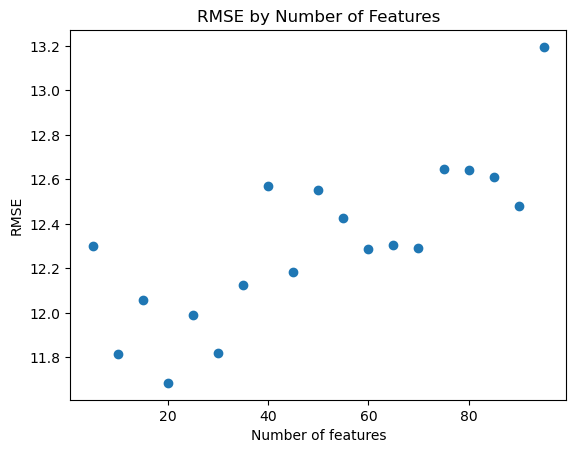

<Figure size 640x480 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
plt.scatter(features,rmse_list)
plt.xlabel('Number of features')
plt.ylabel('RMSE')
plt.title('RMSE by Number of Features')
plt.show()
plt.savefig('RMSEfeatures.png', bbox_inches='tight')

Looks like 20 features is ideal! 

Now that we have that, let's test the test data on our linear regression. We have to create that test data again, as it was created anew each time we ran our feature selection. We also want to run our feature selector again outside of the function so that we can access the features that are best.

In [32]:
fs = SelectKBest(score_func=f_regression, k=20)

X_tr, X_te, y_tr, y_te = train_test_split(ratingsScriptsMLfull2,y,test_size = .2, random_state = 42)
X_best = fs.fit_transform(X_tr, y_tr)
X_te_best = fs.transform(X_te)
lr = LinearRegression()
lr.fit(X_best,y_tr)
y_pred_final = lr.predict(X_te_best)
rm = rmse(y_te, y_pred_final)
print('Linear Regression with 20 features, test data: RMSE=%.3f' % (rm))

Linear Regression with 20 features, test data: RMSE=14.038


Let's get the features that are in the model and make some graphs.

In [33]:
terms = fs.get_feature_names_out()
print(terms)

['19' 'bartender' 'dimly' 'error' 'groggy' 'introduce' 'meaning' 'michael'
 'slightest' 'tables' 'thrill' 'watched' 'genre_adventure'
 'genre_animation' 'genre_drama' 'genre_horror' 'genre_music'
 'genre_musical' 'genre_thriller' 'genre_western']


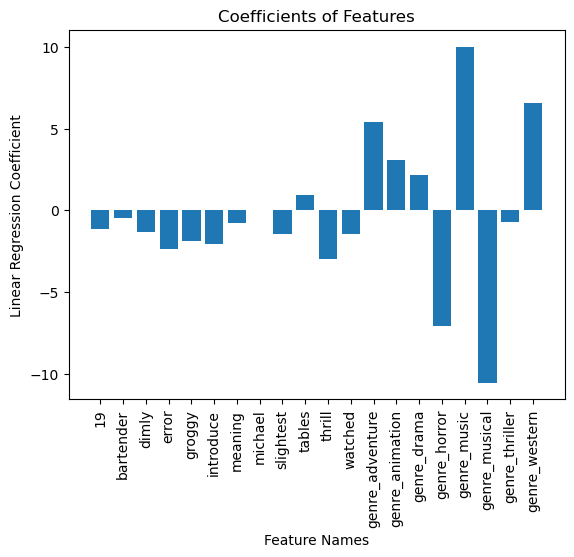

In [37]:
plt.bar(terms,lr.coef_)
plt.xticks(rotation = 90)
plt.xlabel('Feature Names')
plt.ylabel('Linear Regression Coefficient')
plt.title('Coefficients of Features')
plt.show()

In [45]:
coef_and_name = pd.DataFrame({'terms':terms,'coeffs':lr.coef_})
can_sorted = coef_and_name.sort_values('coeffs')

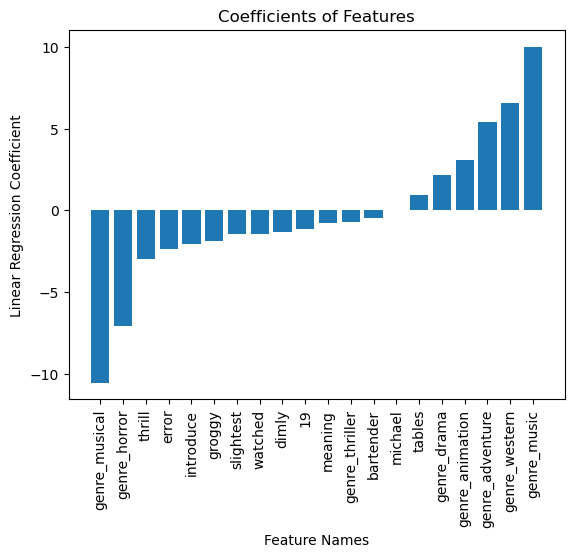

<Figure size 640x480 with 0 Axes>

In [47]:
plt.bar(can_sorted['terms'],can_sorted['coeffs'])
plt.xticks(rotation = 90)
plt.xlabel('Feature Names')
plt.ylabel('Linear Regression Coefficient')
plt.title('Coefficients of Features')
plt.show()
plt.savefig('coeffs.png', bbox_inches='tight')